AO3 analysis: data provenance
================

This notebook presents the code used to generate the plots in post 0 of [my series on Archive of Our Own metadata]().  The underlying database is not, and will not be, public, but the code here can be reused by others with similar plotting needs.

This post just has a couple of plots and data points: the dates each piece of metadata was downloaded, and the total number of works included in my data set.

In [1]:
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from ao3db import ao3db
from utils import renorm_kde_plot

In [2]:
# Some settings that will help us make pretty plots
sns.set(style='whitegrid')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Lucida Grande']
rcParams['font.size'] = 18
rcParams['axes.labelsize'] = 18
rcParams['axes.titlesize'] = 22
rcParams['axes.titleweight'] = 'normal'
rcParams['axes.labelpad'] = 20
rcParams['axes.labelcolor'] = 'gray'
rcParams['figure.figsize'] = (12.0, 8.0)
rcParams['legend.fontsize'] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
figsize = plt.gcf().get_size_inches()
cmap = plt.get_cmap("viridis")
single_color = sns.color_palette('dark')[2]

<Figure size 864x576 with 0 Axes>

In [3]:
db = ao3db()

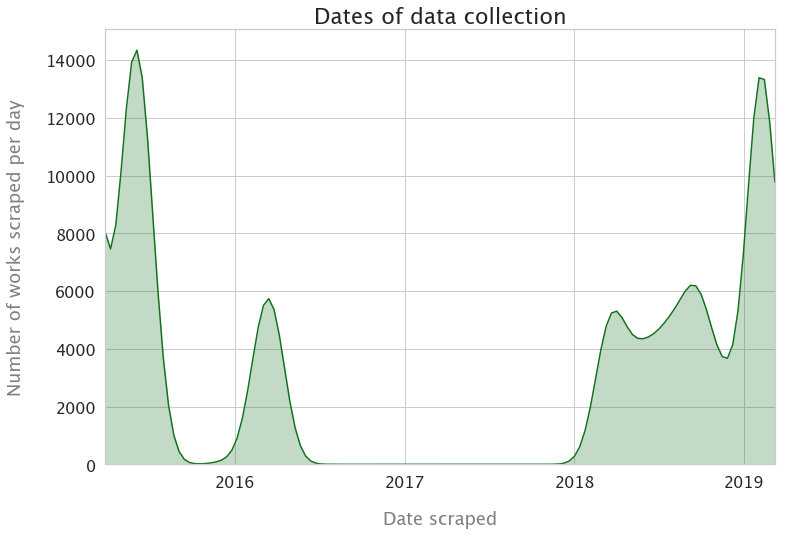

In [4]:
# Make a plot of download dates
data = db.get_data("DownloadDate")
data_date = [d.toordinal() for d in data['DownloadDate']]    
fig, ax = plt.subplots(figsize=figsize)
ax = renorm_kde_plot(data_date, ax, color=single_color)
desired_xticks = [datetime.date(yr, 1, 1).toordinal() for yr in range(2016, 2020)]
ax.set_xticks(desired_xticks)
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y') for x in desired_xticks]
ax.set_xticklabels(xlabels)
ax.set_xlim((np.min(data_date), np.max(data_date)))
ax.set_xlabel("Date scraped")
ax.set_ylabel("Number of works scraped per day")
ax.set_title("Dates of data collection")#, fontdict={'fontsize': rcParams['axes.titlesize']+4, 'fontweight' : 'bold'})
fig.savefig("all_downloads_by_date.png")

In [5]:
# And how many works is this?
print("Total number of works: {}".format(len(data_date)))

Total number of works: 4337545
